In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import numpy as np
import datetime
import pandas as pd


Text(0.5, 1.0, 'Prior Distribution')

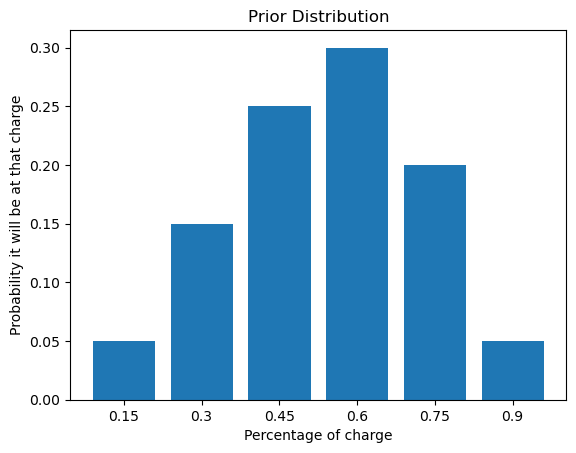

In [24]:
pi = [0.15, 0.30, 0.45, 0.60, 0.75, 0.90]
f_pi = [0.05, 0.15, 0.25, 0.30, 0.20, 0.05]

plt.bar(np.arange(len(f_pi)), f_pi)
plt.xticks(ticks=np.arange(len(f_pi)), labels=pi)
plt.xlabel("Percentage of charge")
plt.ylabel("Probability it will be at that charge")
plt.title("Prior Distribution")

In [25]:
max_battery_assumption = 95000 # Watts

In [26]:
# Get all transactions
today = datetime.datetime.now()
time_format = '%Y-%m-%dT%H:%M:%S.%fZ'

chargers= ["T175-IT1-3420-016", "T175-IT1-3420-003"]
power_consumed = []

for charger in chargers:
    for i in range(4, 3000, 3):
        date_end = datetime.date.today()
        delta_end = datetime.timedelta(days=i)
        delta_start = datetime.timedelta(days=i+3)
        date_end = date_end - delta_end
        date_start = today - delta_start

        date_end = date_end.strftime("%Y-%m-%d")
        date_start = date_start.strftime("%Y-%m-%d")
        response = requests.get(f"http://144.39.204.242:11236/charger/{charger}/transaction?start={date_start}&end={date_end}")
        usage = response.json()


        for charge in usage['data']:
            if charge['powerConsumed'] != None and charge['powerConsumed'] > 0:
                power_consumed.append(charge["powerConsumed"])

df = pd.DataFrame(power_consumed)

df.head()

,0
0,30175
1,5935
2,18997
3,38782
4,46343


# Save to CSV

In [27]:
df.to_csv("power_consumed_while_charging.csv")

# Create CSV that is the percentages instead of the raw amounts

In [38]:
charge_information = {"percentage_charged": [], "percent_from_full": []}

for i in power_consumed:
    charge_information["percentage_charged"].append(i / max_battery_assumption)
    charge_information["percent_from_full"].append(1 - i / max_battery_assumption)

print(charge_information["percentage_charged"])
print(charge_information["percent_from_full"])

df1 = pd.DataFrame(charge_information)
df1.head()
df1.to_csv("charge_information.csv")

[0.31763157894736843, 0.06247368421052631, 0.19996842105263157, 0.40823157894736845, 0.48782105263157893, 0.6033473684210526, 0.4809894736842105, 0.17906315789473684, 0.5053263157894737, 0.0020421052631578946, 0.44057894736842107, 0.004115789473684211, 0.5463052631578947, 0.32363157894736844, 0.01725263157894737, 0.28813684210526314, 0.43222105263157895, 0.39402105263157894, 0.3466315789473684, 0.6827157894736842, 0.1529157894736842, 0.5951052631578947, 0.015863157894736843, 0.11703157894736842, 0.7048947368421052, 0.4122315789473684, 0.0668842105263158, 0.5941473684210526, 0.18197894736842105, 0.20005263157894737, 0.3143157894736842, 0.40053684210526314, 0.052421052631578945, 0.1069578947368421, 0.15883157894736843, 0.3526315789473684, 0.5200210526315789, 0.007673684210526316, 0.2094842105263158, 0.4473473684210526, 0.13657894736842105, 0.08806315789473684, 0.42243157894736844, 0.00047368421052631577, 0.0009894736842105264, 0.0020210526315789473, 0.2521578947368421, 0.0733157894736842

# Compute the Likelihoods

# Compute the Regularizing Constant

# Compute Posteriors and Graph Them